# Homework 2

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

## About the Data Set For Q1-2
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras
- Any other library used during the lectures and discussion sessions.

## About the Data Set For Q3
In this problem, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.


### Other Notes
- Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment.
- Discussion materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.



## Exercise 1 : Building a Feed-Forward Neural Network(50 points in total)

### Exercise 1.1 : Data Preprocessing (10 points)

- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.

### Exercise 1.2 : Training and Testing the Neural Network (40 points)

Design a 4-layer artificial neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a multi-class classification problem so select the right number of nodes accordingly for the output layer.

For training and testing the model, split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance.

Consider the following hyperparameters while developing your model :

- Number of nodes in each hidden layer should be (12, 3)
- Learning rate should be 0.3
- Number of epochs should be 500
- The sigmoid function should be used as the activation function in each layer
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- The accuracy and mean squared error (MSE) of the model
- The precision and recall for each label in the class

__Notes :__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.


In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("Dry_Beans_Dataset.csv")

print("Dataset :")
print(dataset.head())
print("Species : ")
print(dataset['Class'].unique())

print("Dimensions of the dataset : ", dataset.shape)
print("Features of the dataset :")
print(dataset.describe(include = 'all'))


Dataset :
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation   
0  44830    814.955       320.731947       178.405838      1.797766  \
1  33476    691.826       258.837971       165.220760      1.566619   
2  27057    606.138       227.460904       151.860320      1.497830   
3  49483    844.283       326.602913       194.689529      1.677558   
4  22461    544.584       192.801303       148.541136      1.297966   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness   
0      0.831018       45297     238.912806  0.658877  0.989690   0.848226  \
1      0.769773       33907     206.453305  0.721155  0.987289   0.878921   
2      0.744491       27358     185.607226  0.801831  0.988998   0.925436   
3      0.802907       50289     251.005403  0.680179  0.983973   0.872348   
4      0.637517       22699     169.110122  0.774731  0.989515   0.951720   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4   
0     0.744899      0.0071

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [16]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

#normalize data
scaler = MinMaxScaler(feature_range=(0,1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns=X.columns)


set_of_classes = y.value_counts().index.tolist()
set_of_classes = pd.DataFrame({'Class': set_of_classes})
y = pd.get_dummies(y)

print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

Pre-processed data :
           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation   
0      0.104229   0.198694         0.246967         0.165518      0.549934  \
1      0.055748   0.114396         0.135499         0.126473      0.385468   
2      0.028340   0.055731         0.078990         0.086908      0.336523   
3      0.124097   0.218773         0.257541         0.213740      0.464403   
4      0.008715   0.013589         0.016569         0.077079      0.194315   
...         ...        ...              ...              ...           ...   
13606  0.083417   0.150914         0.162566         0.189677      0.315266   
13607  0.646868   0.733202         0.747292         0.728031      0.426928   
13608  0.118900   0.200327         0.218063         0.236224      0.342497   
13609  0.097606   0.217940         0.274969         0.124833      0.723842   
13610  0.112880   0.194735         0.214304         0.223307      0.358612   

       Eccentricity  ConvexArea  EquivDiam

In [17]:
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1)

In [22]:
mlp = MLPClassifier(solver='sgd', activation='logistic', learning_rate_init=0.3, batch_size=100, hidden_layer_sizes=(12,3), max_iter=500)
mlp

MLPClassifier(activation='logistic', batch_size=100, hidden_layer_sizes=(12, 3),
              learning_rate_init=0.3, max_iter=500, solver='sgd')

In [27]:
mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

In [30]:
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.9045521292217328
Mean Square Error :  0.022341095028319696
Confusion Matrix for each label : 
[[[1232   11]
  [  10  109]]

 [[1313    0]
  [   0   49]]

 [[1191    4]
  [  16  151]]

 [[ 939   47]
  [  18  358]]

 [[1162    3]
  [  15  182]]

 [[1161    7]
  [  10  184]]

 [[1073   29]
  [  43  217]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       119
           1       1.00      1.00      1.00        49
           2       0.97      0.90      0.94       167
           3       0.88      0.95      0.92       376
           4       0.98      0.92      0.95       197
           5       0.96      0.95      0.96       194
           6       0.88      0.83      0.86       260

   micro avg       0.93      0.92      0.92      1362
   macro avg       0.94      0.93      0.93      1362
weighted avg       0.93      0.92      0.92      1362
 samples avg       0.91      0.92      0.91      1362



C:\Users\Anthony\anaconda3\envs\ecs171\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Exercise 2 : k-fold Cross Validation (10 points in total)

In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.

__Requirements :__
- The accuracy and MSE values during each iteration of the cross validation
- The overall average accuracy and MSE value

__Note :__ The mean squared error (MSE) values obtained should be positive.

In [31]:
from sklearn.model_selection import cross_validate

In [32]:
CV = cross_validate(mlp, X, y, cv=10, scoring=['accuracy', 'neg_mean_squared_error'])
print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

Accuracy
[0.86049927 0.89346069 0.88317414 0.88464364 0.91182954 0.89860397
 0.85378398 0.90668626 0.84055841 0.89860397]
MSE
[0.02727082 0.0229873  0.02792065 0.02582135 0.02036318 0.02414191
 0.02981001 0.02214758 0.03180435 0.02435184]


In [33]:
print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

Average Accuracy =  0.8831843865344758
Average MSE =  0.025661898858596027


## Exercise 3 - Logistic Regression (20 points in total)
Recall the dataset from last week homework

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

In [36]:
df = pd.read_csv('auto-mpg.csv')
data = df.copy().loc[(df['origin'] != 'Europe'), :]
train, test = train_test_split(data, test_size=0.2)
X_train, y_train = train.drop(columns=['origin']) ,train['origin']
X_test, y_test = test.drop(columns=['origin']), test['origin']

### Exercise 3.2 - Logistic Regression (15 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.

In [38]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()
cls.fit(X_train, y_train)
print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

       Japan       0.80      0.84      0.82        19
         USA       0.93      0.91      0.92        46

    accuracy                           0.89        65
   macro avg       0.87      0.88      0.87        65
weighted avg       0.89      0.89      0.89        65



I believe that the model will perform poorly since the model wasn't trained on European cars. We may be able to perform the same on Japanese cars using the same curve, but European accuracy will be low. 

We demonstrate the hypothesis below:

In [50]:
df = pd.read_csv('auto-mpg.csv')
data = df.copy().loc[(df['origin'] != 'USA'), :]
train, test = train_test_split(data, test_size=0.2)
X_train, y_train = train.drop(columns=['origin']) ,train['origin']
X_test, y_test = test.drop(columns=['origin']), test['origin']

print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

      Europe       0.00      0.00      0.00        15
       Japan       0.50      0.67      0.57        15
         USA       0.00      0.00      0.00         0

    accuracy                           0.33        30
   macro avg       0.17      0.22      0.19        30
weighted avg       0.25      0.33      0.29        30



C:\Users\Anthony\anaconda3\envs\ecs171\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anthony\anaconda3\envs\ecs171\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anthony\anaconda3\envs\ecs171\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anthony\anac

## Exercise 4 - Polynomial Regressor using Gradient Descent (20 points in total)
Now we are going to look into model fitting. In the dataset cost.csv, the first column is the independent variable cost, and the second column is the dependent variable production_output.

### Exercise 4.1 - Split the dataset (5 points)
Import the dataset cost.csv and split them into training and testing set with ratio 70:30.

In [87]:
df = pd.read_csv('cost.csv')

X=df.production_output
y=df.cost


### Exercise 4.2 - Polynomial Regression (15 points)
Compute the RMSE and R2 for the training and testing set. Using polynomial regression with degree 1, 2, 3, and 4, which model provides the most appropriate prediction? Justify your answer and plot the models fitted line.

The most appropriate addiction was the model with degree 4. It was able to accurately capture the curve projected by the data from beginning to the end where as the model with degree 3 couldn't get the beginning. The model with degree 2 had a decent approximation but was not accurate to the extent of usability and the model with degree 1 was essentially a linear regression put against an exponential dataset.

Model weights: 
[  0.         680.50205751]

Training RMSE: 436.710740088723583
Training R2: 0.621594513627181

Test RMSE: 301.570414296971251
Test R2: 0.360176954925603


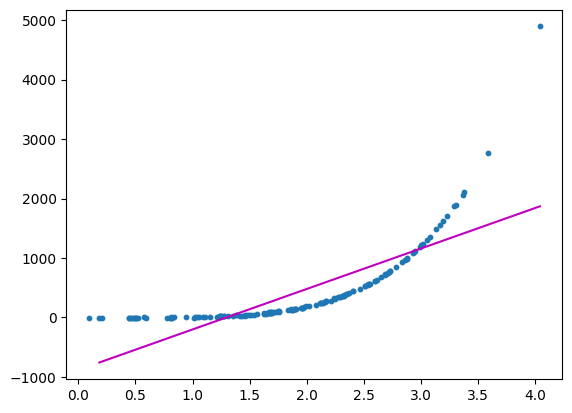

In [100]:
#Constructing a 2nd order Polynomail Regression
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=1)

x_poly = polynomial_features.fit_transform(X.values.reshape(-1,1))

x_poly_train, x_poly_test, y_train, y_test = x_poly[:-45], x_poly[-45:], y[:-45], y[-45:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)


print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()


Model weights: 
[    0.         -1212.52421285   486.32418392]

Training RMSE: 173.047396154091871
Training R2: 0.940584491720251

Test RMSE: 149.553985370251297
Test R2: 0.842645779947358


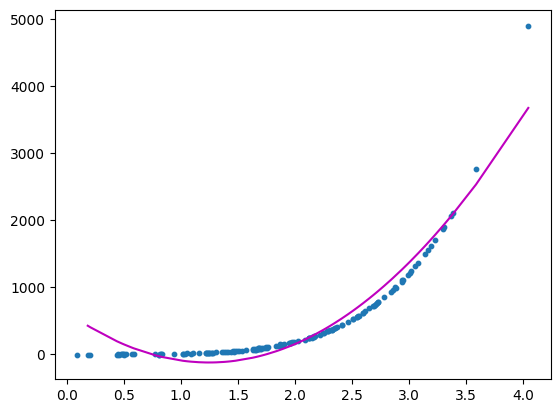

In [101]:
polynomial_features= PolynomialFeatures(degree=2)

x_poly = polynomial_features.fit_transform(X.values.reshape(-1,1))

x_poly_train, x_poly_test, y_train, y_test = x_poly[:-45], x_poly[-45:], y[:-45], y[-45:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)


print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()

Model weights: 
[   0.          780.44230502 -680.62706332  195.42737561]

Training RMSE: 36.720837164490355
Training R2: 0.997324562398663

Test RMSE: 35.178653073829778
Test R2: 0.991293555671935


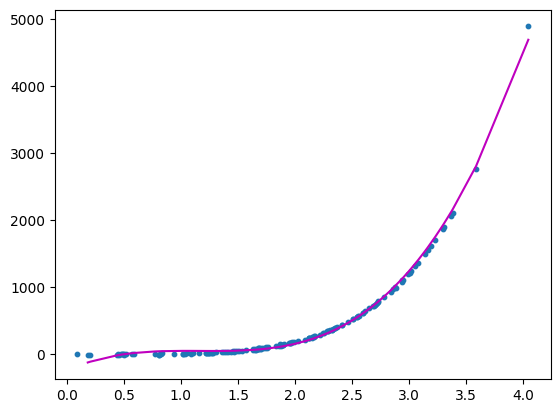

In [102]:
polynomial_features= PolynomialFeatures(degree=3)

x_poly = polynomial_features.fit_transform(X.values.reshape(-1,1))

x_poly_train, x_poly_test, y_train, y_test = x_poly[:-45], x_poly[-45:], y[:-45], y[-45:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)


print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()

Model weights: 
[   0.         -129.88150432  193.44789107 -119.98610235   38.00294413]

Training RMSE: 5.941630708638818
Training R2: 0.999929954378982

Test RMSE: 6.025186645859562
Test R2: 0.999744598512193


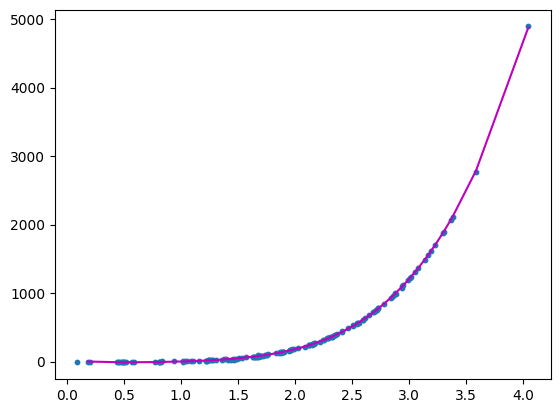

In [103]:
polynomial_features= PolynomialFeatures(degree=4)

x_poly = polynomial_features.fit_transform(X.values.reshape(-1,1))

x_poly_train, x_poly_test, y_train, y_test = x_poly[:-45], x_poly[-45:], y[:-45], y[-45:]

model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)


print("Model weights: ")
print(model.coef_)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('\nTraining RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

# Reporting for the test set:
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_test = r2_score(y_test,y_test_pred)
print('\nTest RMSE: %8.15f' % rmse_test)
print('Test R2: %8.15f' % r2_test)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, y_train_pred, color='m')
plt.show()